## Assignment - 2 

**Problem Statement:** 

Collection of sports images covering 73 different sports. Images are 224,224,3 jpg format.

**DataSet:** 

Comprises of sports images. Use 'train' folder images for training the model and 'valid' for evaluating the model or tunning the hyperparameters and 'test' for reporting the final numbers of F1 Score and the model accuracy.

**Dataset Link:**  

https://drive.google.com/file/d/1XjWe1nCESkO5fBvYS6CZMqdHAWoUuWAo/view?usp=sharing


#### Initial steps

In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
!nvidia-smi

Sun Aug 15 16:28:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    11W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from IPython.display import clear_output

In [4]:
!pip install ipyplot

clear_output()

In [5]:
import ipyplot 
import glob

from PIL import Image


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `base_64` param to `True`.
        


In [6]:
!gdown --id 1XjWe1nCESkO5fBvYS6CZMqdHAWoUuWAo

Downloading...
From: https://drive.google.com/uc?id=1XjWe1nCESkO5fBvYS6CZMqdHAWoUuWAo
To: /content/Sports_Dataset.zip
296MB [00:02, 108MB/s]


In [7]:
!unzip /content/Sports_Dataset.zip

clear_output()

In [8]:
!rm -rf /content/Sports_Dataset.zip

In [9]:
class_labels = []
for name in glob.glob('/content/archive/train/*'):
  class_labels.append(name.split('/')[-1])

images_array_names = []
for i in range(len(class_labels)):
  images_array_names.append('image' + str(i))

images_array = []
imagelabels = []
for i in range(len(class_labels)):
  for path in glob.glob('/content/archive/train/' + class_labels[i] + '/001.jpg'):
    images_array_names[i] = Image.open(path)
    images_array.append(images_array_names[i])
    imagelabels.append(str(class_labels[i]))


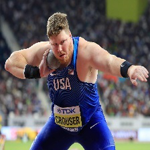
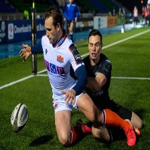
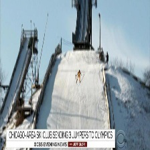
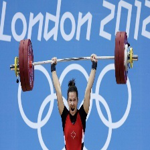
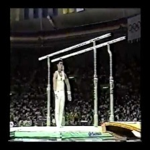
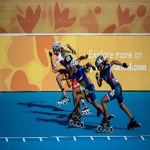
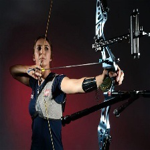
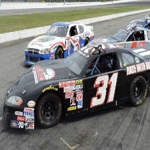
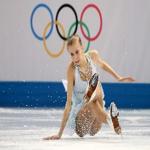
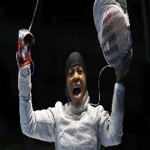
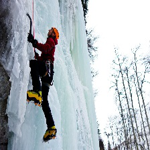
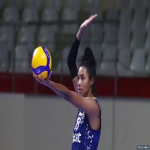
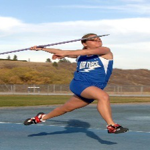
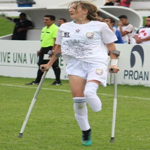
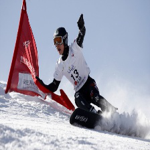
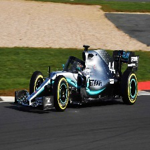
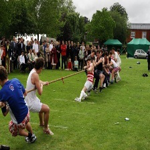
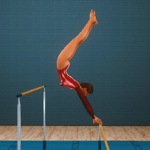
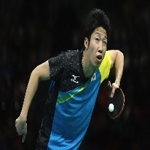
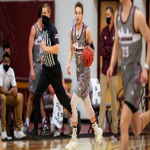
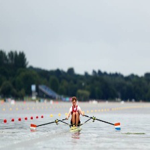
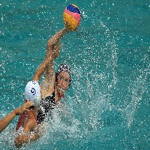
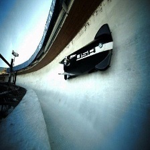
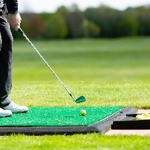
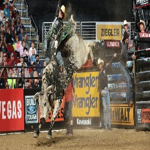
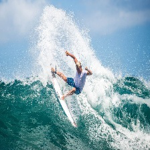
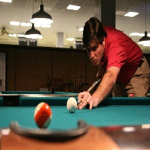
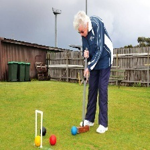
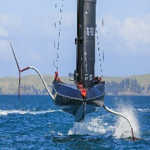
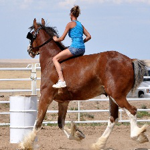
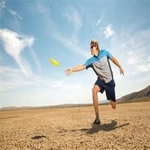
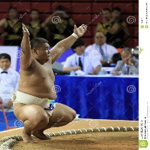
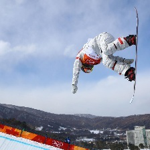
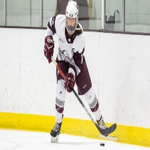
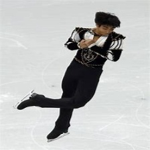
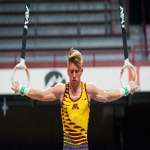
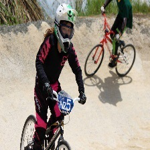
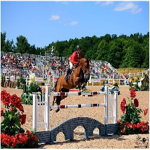
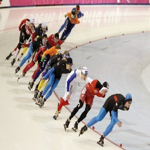
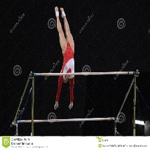
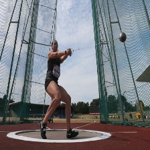
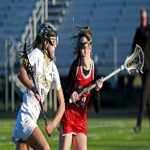
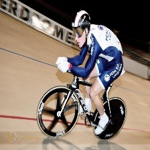
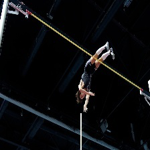
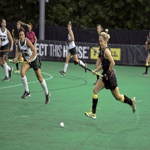
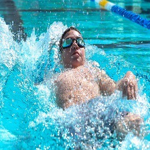
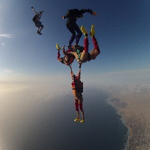
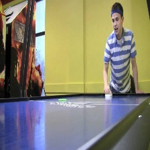
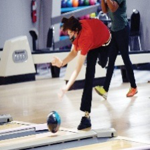
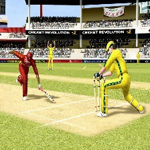
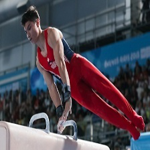
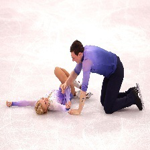
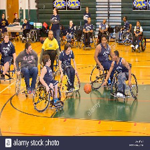
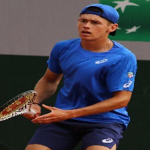
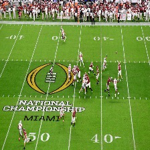
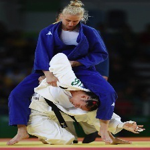
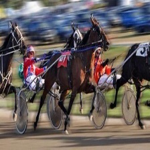
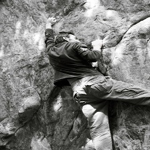
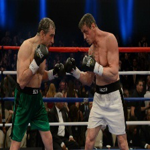
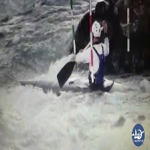
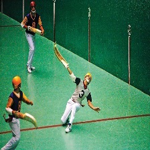
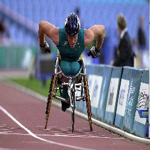
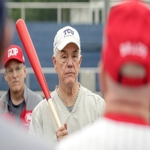
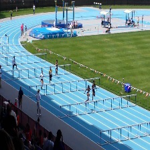
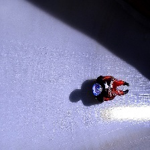
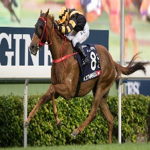
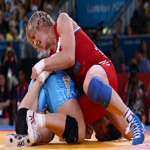
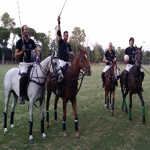
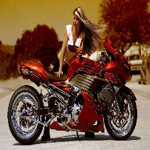
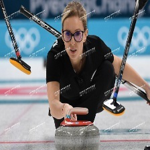
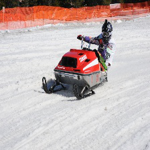
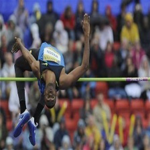


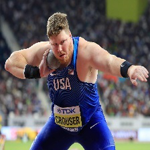
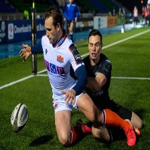
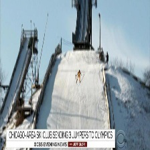
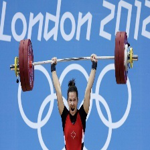
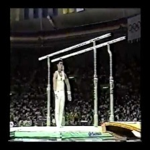
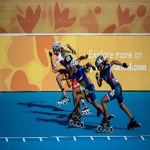
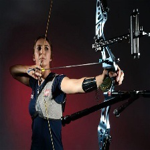
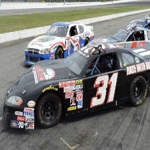
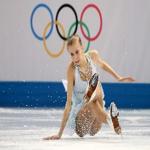
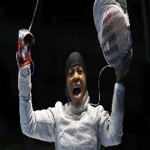
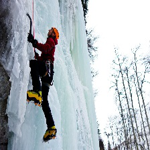
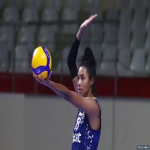
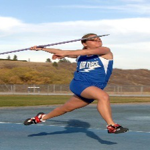
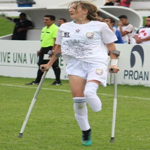
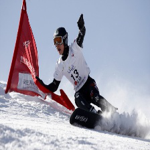
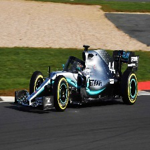
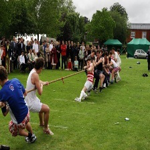
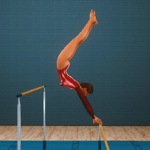
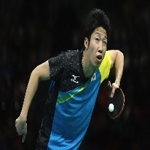
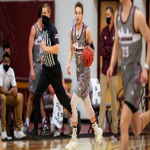
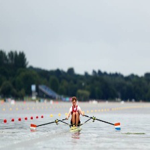
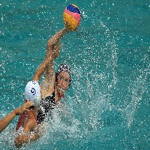
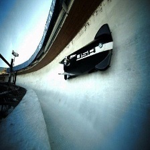
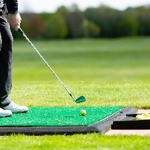
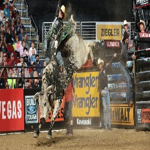
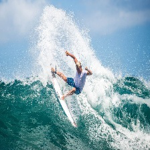
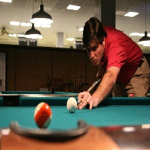
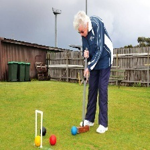
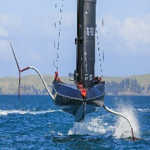
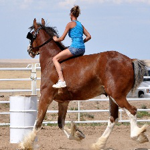
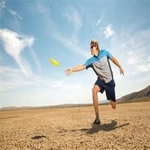
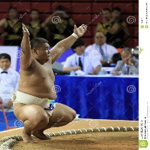
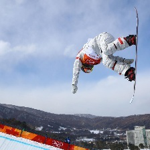
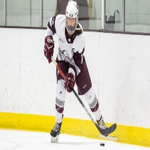
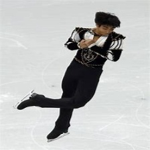
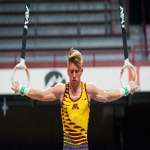
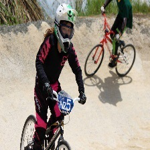
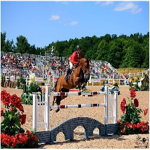
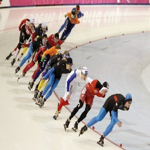
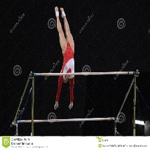
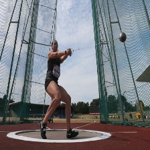
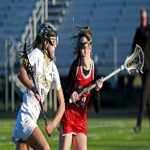
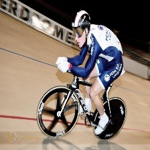
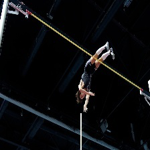
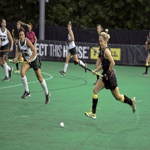
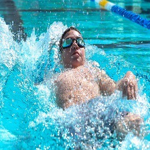
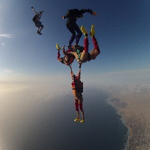
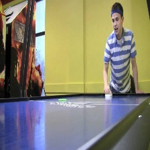
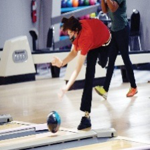
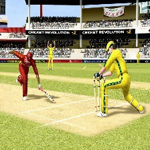
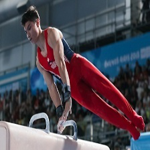
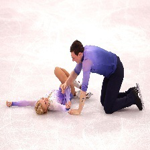
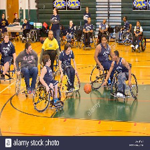
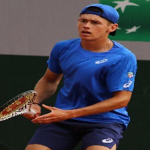
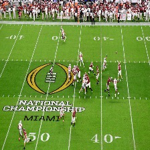
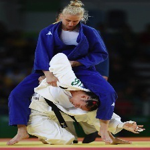
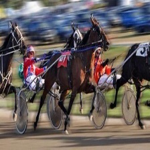
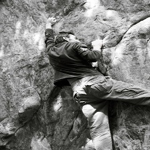
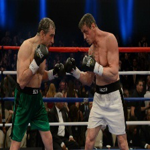
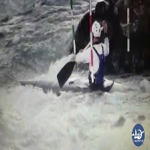
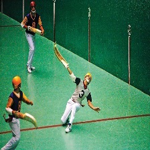
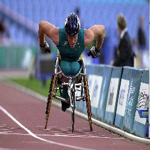
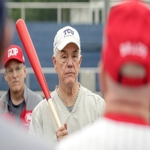
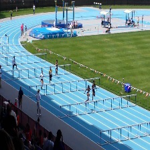
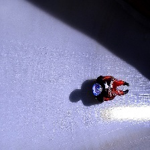
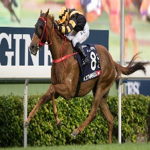
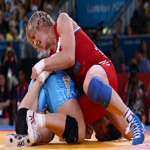
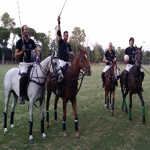
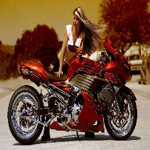
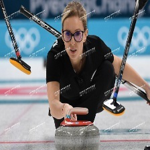
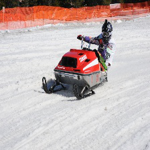
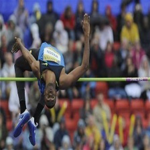

In [10]:
ipyplot.plot_images(images_array, labels = imagelabels, max_images=100)
#plot the first image from every class in the train folder

#### 1. Load the images in appropriate data structures in your program, ready to be passed as input to the model for training. Consider input image size to be 224x224x3.

In [11]:
import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam

In [12]:
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory('/content/archive/train',target_size=(224,224))

valid_datagen = ImageDataGenerator()
valid_generator = valid_datagen.flow_from_directory('/content/archive/valid',target_size=(224,224))

test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory('/content/archive/test',target_size=(224,224))

Found 10416 images belonging to 73 classes.
Found 365 images belonging to 73 classes.
Found 365 images belonging to 73 classes.


In [13]:
for image_batch, label_batch in train_generator:
  break

print('image_batch shape:',image_batch.shape,'\nlabel_batch shape:',label_batch.shape)

image_batch shape: (32, 224, 224, 3) 
label_batch shape: (32, 73)


In [14]:
print(train_generator.class_indices)
#All the classes and their indices

{'air hockey': 0, 'ampute football': 1, 'archery': 2, 'arm wrestling': 3, 'balance beam': 4, 'barell racing': 5, 'baseball': 6, 'basketball': 7, 'billiards': 8, 'bmx': 9, 'bobsled': 10, 'bowling': 11, 'boxing': 12, 'bull riding': 13, 'canoe slamon': 14, 'cricket': 15, 'croquet': 16, 'curling': 17, 'fencing': 18, 'field hockey': 19, 'figure skating men': 20, 'figure skating pairs': 21, 'figure skating women': 22, 'football': 23, 'formula 1 racing': 24, 'frisbee': 25, 'giant slalom': 26, 'golf': 27, 'hammer throw': 28, 'harness racing': 29, 'high jump': 30, 'hockey': 31, 'horse jumping': 32, 'horse racing': 33, 'hurdles': 34, 'ice climbing': 35, 'jai alai': 36, 'javelin': 37, 'judo': 38, 'lacrosse': 39, 'luge': 40, 'motorcycle racing': 41, 'nascar racing': 42, 'olympic wrestling': 43, 'parallel bar': 44, 'pole vault': 45, 'polo': 46, 'pommel horse': 47, 'rings': 48, 'rock climbing': 49, 'rollerblade racing': 50, 'rowing': 51, 'rugby': 52, 'sailboat racing': 53, 'shot put': 54, 'ski jumpi

#### 2. Configure the CNN model (use keras tensorflow), an indicative (minimal) configuration is as below. Take activation function (A)=relu. Feel free to use standard values for anything that is not mentioned (eg, take pool size 2x2, filter size 3x3, and so on). 

    conv --> A --> pool

    (conv --> A) --> (conv --> A) --> pool

    full connected layer --> A

    softmax classifier

In [15]:
default_model = Sequential()
default_model.add(layers.Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=(224,224,3)))
default_model.add(layers.MaxPooling2D(pool_size=2))
default_model.add(layers.Conv2D(filters=32,kernel_size=3,padding="same",activation ="relu"))
default_model.add(layers.Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
default_model.add(layers.MaxPooling2D(pool_size=2))
default_model.add(layers.Flatten())
default_model.add(layers.Dense(150,activation="relu"))
default_model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [16]:
default_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 150)               1

In [17]:
default_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

#### 3. Train the CNN model for E epoch (take E=50), save the train_loss, train_acc, validation_loss, validation_acc for each epoch and plot it after training has finished.

In [18]:
hist = default_model.fit(train_generator, epochs=50,  validation_data=valid_generator).history

Epoch 1/50
326/326 [==============================] - 70s 74ms/step - loss: 95.3467 - accuracy: 0.0343 - precision: 0.0222 - recall: 0.0024 - val_loss: 3.9097 - val_accuracy: 0.0904 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
326/326 [==============================] - 24s 74ms/step - loss: 3.1606 - accuracy: 0.2613 - precision: 0.8016 - recall: 0.1043 - val_loss: 3.8211 - val_accuracy: 0.0959 - val_precision: 0.4500 - val_recall: 0.0247
Epoch 3/50
326/326 [==============================] - 23s 70ms/step - loss: 1.4127 - accuracy: 0.6551 - precision: 0.9398 - recall: 0.4993 - val_loss: 5.5061 - val_accuracy: 0.1315 - val_precision: 0.1567 - val_recall: 0.0575
Epoch 4/50
326/326 [==============================] - 23s 71ms/step - loss: 0.5188 - accuracy: 0.8760 - precision: 0.9736 - recall: 0.8125 - val_loss: 7.6794 - val_accuracy: 0.1178 - val_precision: 0.1471 - val_recall: 0.0822
Epoch 5/50
326/326 [==============================] - 24s 74ms/step - loss: 0.2291 - ac

In [19]:
final_loss, final_accuracy, final_precision, final_recall = default_model.evaluate(valid_generator)

print('Final loss: {:.2f}'.format(final_loss))

print('Final accuracy: {:.2f}%'.format(final_accuracy * 100))

print('Final Precision: {:.2f}'.format(final_precision))

print('Final Recall: {:.2f}'.format(final_recall))

12/12 [==============================] - 1s 55ms/step - loss: 33.1072 - accuracy: 0.0986 - precision: 0.1003 - recall: 0.0959
Final loss: 33.11
Final accuracy: 9.86%
Final Precision: 0.10
Final Recall: 0.10


No handles with labels found to put in legend.
No handles with labels found to put in legend.


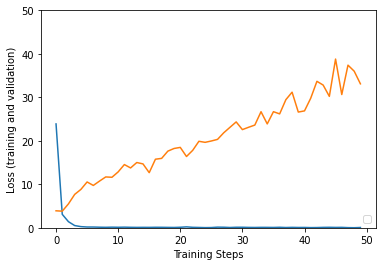

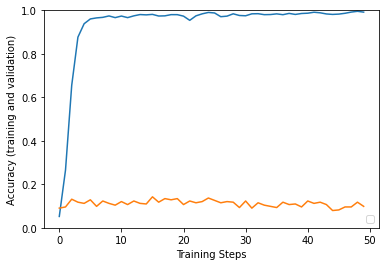

In [20]:
plt.figure()
plt.ylabel('Loss (training and validation)')
plt.xlabel('Training Steps')
plt.ylim([0,50])
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(loc='lower right')

plt.figure()
plt.ylabel('Accuracy (training and validation)')
plt.xlabel('Training Steps')
plt.ylim([0,1])
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(loc='lower right')


#### 4. Evaluate the trained CNN model on test data. Print classification results.

In [21]:
loss, acc, default_model_precision, default_model_recall = default_model.evaluate(test_generator)

print('Test loss: %.2f' % (loss))

print('Test accuracy: %.2f' % (acc * 100.0))

print('Test precision: %.2f' %(default_model_precision))

print('Test recall: %.2f' %(default_model_recall))

12/12 [==============================] - 1s 57ms/step - loss: 32.9507 - accuracy: 0.0932 - precision: 0.0891 - recall: 0.0849
Test loss: 32.95
Test accuracy: 9.32
Test precision: 0.09
Test recall: 0.08


#### 5. Can you try to make changes in anyway in the CNN model and improve your test accuracy? Let's call the model constructed as per step-2 above as 'default' and the improvement as 'improved' model. Plot precision and recall for default and improved model in a single bar plot. 

In [22]:
from keras.preprocessing import image
from keras.layers import Dense, Dropout
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.vgg16 import preprocess_input

In [23]:
improved = VGG16(include_top = False, input_shape = (224,224,3), weights='imagenet')

improved_model = Sequential([improved])
improved_model.add(layers.Flatten())
improved_model.add(layers.Dense(150,activation="relu"))
improved_model.add(layers.Dense(train_generator.num_classes, activation='softmax'))
improved_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               3763350   
_________________________________________________________________
dense_3 (Dense)              (None, 73)                11023     
Total params: 18,489,061
Trainable params: 18,489,061
Non-trainable params: 0
_________________________________________________________________


In [24]:
improved_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [25]:
hist = improved_model.fit(train_generator, epochs=25,  validation_data=valid_generator).history

Epoch 1/25
326/326 [==============================] - 149s 420ms/step - loss: 7.2761 - accuracy: 0.0183 - precision_1: 0.0138 - recall_1: 8.6896e-04 - val_loss: 4.1511 - val_accuracy: 0.0384 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/25
326/326 [==============================] - 127s 391ms/step - loss: 4.0334 - accuracy: 0.0575 - precision_1: 0.5024 - recall_1: 0.0025 - val_loss: 3.8667 - val_accuracy: 0.0767 - val_precision_1: 1.0000 - val_recall_1: 0.0027
Epoch 3/25
326/326 [==============================] - 127s 391ms/step - loss: 3.6845 - accuracy: 0.0901 - precision_1: 0.6002 - recall_1: 0.0054 - val_loss: 3.5088 - val_accuracy: 0.1151 - val_precision_1: 1.0000 - val_recall_1: 0.0082
Epoch 4/25
326/326 [==============================] - 128s 391ms/step - loss: 3.4382 - accuracy: 0.1309 - precision_1: 0.5541 - recall_1: 0.0107 - val_loss: 3.2099 - val_accuracy: 0.1753 - val_precision_1: 0.6154 - val_recall_1: 0.0219
Epoch 5/25
326/326 [========================

In [26]:
loss, acc, improved_model_precision, improved_model_recall = improved_model.evaluate(test_generator, steps=len(test_generator), verbose=0) 

print('Improved model loss: %.2f' % (loss))

print('Improved model accuracy: %.2f' % (acc * 100.0))

print('Improved model precision: %.2f' %(improved_model_precision))

print('Improved model recall: %.2f' %(improved_model_recall))

Improved model loss: 4.95
Improved model accuracy: 31.78
Improved model precision: 0.37
Improved model recall: 0.26


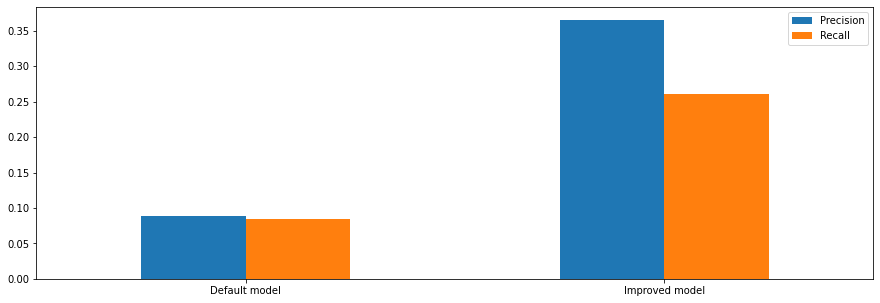

In [27]:
#bar plot
plt.rcParams["figure.figsize"] = (15,5)
Precision = [default_model_precision, improved_model_precision]
Recall = [default_model_recall, improved_model_recall]
index = ['Default model', 'Improved model']
df = pd.DataFrame({'Precision': Precision,
                    'Recall': Recall}, index=index)
ax = df.plot.bar(rot=0)